In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import ast
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
df=df.interpolate(method='linear',limit_direction='forward')

<ipython-input-86-d2256c3c338e>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate(method='linear',limit_direction='forward')


In [ ]:
le = LabelEncoder()
df["Traffic_Conditions"] = le.fit_transform(df["Traffic_Conditions"])
df["Order_Priority"] = le.fit_transform(df["Order_Priority"])
df["Weather_Conditions"] = le.fit_transform(df["Weather_Conditions"])

df = pd.get_dummies(df, columns=["Vehicle_Type"],drop_first=True)

print(df.head())


  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

   Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                   1                   2                           4   
1                   0                   2                           8   
2                   2                   2                           9   
3                   0                   1                           2   
4                   1                   0                           6   

   Order_Priority Order_Time  Restaurant_Rating  Customer_Rating  \
0               2  Afternoon                4.1             

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[['Distance','Delivery_Time','Order_Cost']])
scaled_data


array([[-1.4547383 , -1.48793232,  0.50185201],
       [ 1.43919167, -0.26498668, -1.63429385],
       [-0.66641712, -0.74152884,  1.09264603],
       [ 0.33583508,  1.38241083, -0.92332346],
       [-0.70011859, -1.28091542, -0.7797551 ],
       [-0.21950642, -0.32850323, -0.34016838],
       [-0.9301677 , -1.40257145, -0.72558801],
       [ 1.62235179, -0.44411007, -1.33812929],
       [ 0.24791822, -0.78219287,  0.32266568],
       [ 1.18130221,  0.37152309, -1.14626012],
       [ 1.00253793, -1.20362014, -1.48624812],
       [-1.23934199,  1.22277929, -0.25221083],
       [-1.48843976, -1.59211291,  1.46278778],
       [-1.55730797, -0.50628236, -0.40963163],
       [-0.20924945, -1.38475993, -1.19337305],
       [ 1.35274009, -0.68506968, -0.13494019],
       [ 0.36953654, -1.77997402, -1.00852148],
       [-0.99024422,  0.30733441, -1.58274009],
       [-0.42318048, -0.98148025,  0.19276702],
       [ 0.31532114,  1.17741032,  1.40125587],
       [ 1.13734378, -0.91762763,  0.607

In [ ]:
d=df[['Distance','Delivery_Person_Experience','Restaurant_Rating','Customer_Rating','Delivery_Time','Order_Cost','Tip_Amount']]
d.mean()

,0
Distance,11.49805
Delivery_Person_Experience,5.25000
Restaurant_Rating,3.73850
Customer_Rating,3.68650
Delivery_Time,70.49495
Order_Cost,1046.48870
Tip_Amount,46.61665


In [ ]:
d.median()

,0
Distance,10.265
Delivery_Person_Experience,5.000
Restaurant_Rating,3.800
Customer_Rating,3.700
Delivery_Time,72.775
Order_Cost,1035.950
Tip_Amount,47.530


In [ ]:
d.mode()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,1.32,8.0,3.8,2.6,66.84,1813.25,2.22
1,3.25,NaN,NaN,3.4,NaN,NaN,24.16
2,4.33,NaN,NaN,NaN,NaN,NaN,NaN
3,6.09,NaN,NaN,NaN,NaN,NaN,NaN
4,7.38,NaN,NaN,NaN,NaN,NaN,NaN
5,7.87,NaN,NaN,NaN,NaN,NaN,NaN
6,9.17,NaN,NaN,NaN,NaN,NaN,NaN
7,10.00,NaN,NaN,NaN,NaN,NaN,NaN
8,10.11,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d.var()

,0
Distance,46.809617
Delivery_Person_Experience,7.535176
Restaurant_Rating,0.494239
Customer_Rating,0.485897
Delivery_Time,889.870323
Order_Cost,300927.862112
Tip_Amount,862.109808


In [ ]:
d.std()

,0
Distance,6.841755
Delivery_Person_Experience,2.745027
Restaurant_Rating,0.703021
Customer_Rating,0.697063
Delivery_Time,29.830694
Order_Cost,548.568922
Tip_Amount,29.361706


In [ ]:
d.skew()

,0
Distance,0.291117
Delivery_Person_Experience,-0.005337
Restaurant_Rating,-0.051046
Customer_Rating,0.076094
Delivery_Time,-0.180984
Order_Cost,-0.023487
Tip_Amount,0.084603


In [ ]:
d.kurt()

,0
Distance,-0.978265
Delivery_Person_Experience,-1.221268
Restaurant_Rating,-1.048698
Customer_Rating,-1.227153
Delivery_Time,-1.099662
Order_Cost,-1.204280
Tip_Amount,-1.156979


Text(0, 0.5, 'Second Principal Component')

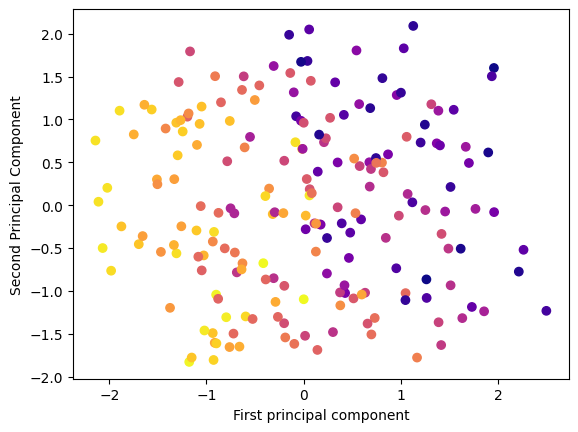

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)


plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Delivery_Time'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

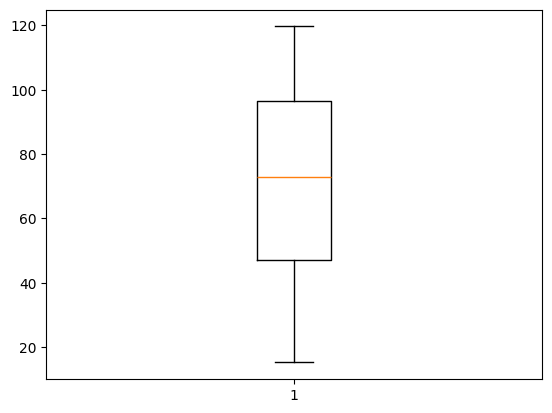

Outliers: []


In [ ]:
plt.boxplot(df['Delivery_Time'])
plt.show()

# Calculate IQR and outlier boundaries
Q1 = np.percentile(df['Delivery_Time'], 25)
Q3 = np.percentile(df['Delivery_Time'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [x for x in df['Delivery_Time'] if x < lower_bound or x > upper_bound]
print(f"Outliers: {outliers}")

In [ ]:
def haversine(Restaurant_Location,Customer_Location):
    R = 6371  # Earth’s radius in km
    lat1, lon1 = Restaurant_Location
    lat2, lon2 = Customer_Location
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c  # Distance in km

In [ ]:
# Apply haversine function to calculate distances
df["Distance"] = df.apply(lambda row: haversine(ast.literal_eval(row["Restaurant_Location"]), ast.literal_eval(row["Customer_Location"])), axis=1)


# Display results
print(df[["Restaurant_Location", "Customer_Location", "Distance"]])

        Restaurant_Location       Customer_Location     Distance
0    (12.358515, 85.100083)  (17.030479, 79.743077)   775.651198
1    (14.174874, 77.025606)  (15.398319, 86.639122)  1042.385597
2    (19.594748, 82.048482)  (15.687342, 83.888808)   476.220706
3    (16.915906, 78.278698)  (20.415599, 78.046984)   389.912629
4    (15.206038, 86.203182)  (14.786904, 78.706532)   806.505886
..                      ...                     ...          ...
195  (18.098924, 87.896124)   (17.910045, 81.56199)   670.130652
196  (16.892341, 80.554716)   (21.66459, 82.226635)   558.891202
197  (13.625369, 82.418092)   (14.575401, 82.55641)   106.686689
198  (19.135509, 86.659978)  (12.094497, 82.893369)   880.580093
199   (20.941636, 77.01334)  (19.360304, 84.132424)   763.581776

[200 rows x 3 columns]


In [ ]:
# Mapping Order_Time categories to approximate hour ranges
time_mapping = {
    "Morning": 8,    # 5 AM - 12 PM
    "Afternoon": 14, # 12 PM - 5 PM
    "Evening": 18,   # 5 PM - 9 PM
    "Night": 22      # 9 PM - 5 AM
}

# Create a new column for estimated hour of order
df['Hour_of_Day'] = df['Order_Time'].map(time_mapping)

# Define rush hours (Example: 7-9 AM, 5-8 PM)
df['Rush_Hour'] = df['Hour_of_Day'].apply(lambda x: 1 if x in [8, 18] else 0)

# Display results
print(df[['Order_Time', 'Hour_of_Day', 'Rush_Hour']])


    Order_Time  Hour_of_Day  Rush_Hour
0    Afternoon           14          0
1        Night           22          0
2        Night           22          0
3      Evening           18          1
4        Night           22          0
..         ...          ...        ...
195      Night           22          0
196      Night           22          0
197  Afternoon           14          0
198      Night           22          0
199    Morning            8          1

[200 rows x 3 columns]


In [ ]:
X = df[['Distance','Traffic_Conditions','Order_Priority']]
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred



array([72.3985126 , 71.70743173, 67.56198234, 70.32997506, 73.70968356,
       68.96907992, 71.35720053, 71.63103065, 73.90432471, 65.51544525,
       70.50292874, 67.5843354 , 71.58427049, 69.5780078 , 70.8599587 ,
       71.40835279, 68.43218967, 72.37905531, 70.03016228, 72.21907316,
       69.27422377, 71.2137799 , 66.45044196, 72.88822184, 70.27951704,
       72.66442889, 70.92914017, 69.64576119, 71.5520864 , 68.6761055 ,
       72.26311368, 68.91206788, 67.40496421, 68.58641991, 66.57688021,
       69.61507344, 70.96596108, 65.32945179, 70.58762491, 71.57161195])

In [ ]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 903.2591641475301
R-squared (R²): 0.007368955027214907
Mean Absolute Error (MAE): 26.19980813327873


In [ ]:
threshold = df['Delivery_Time'].median()  # Using the median delivery time as a threshold

# Create the target variable 'Delivery_Status'
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: "Fast" if x <= threshold else "Delayed")

# Encode 'Delivery_Status'
le = LabelEncoder()
df["Delivery_Status"] = le.fit_transform(df["Delivery_Status"])

# Select features (X) and target (y)
X = df[['Distance','Traffic_Conditions','Weather_Conditions','Delivery_Person_Experience','Order_Priority']] # Consider other relevant features
y = df['Delivery_Status']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred


array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.525
Precision: 0.47058823529411764
Recall: 0.4444444444444444
F1-score: 0.45714285714285713
Confusion Matrix:
[[13  9]
 [10  8]]


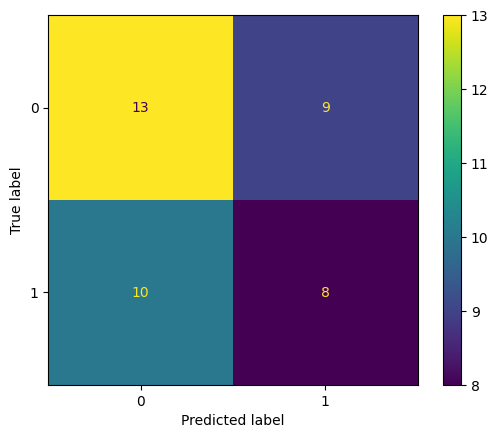

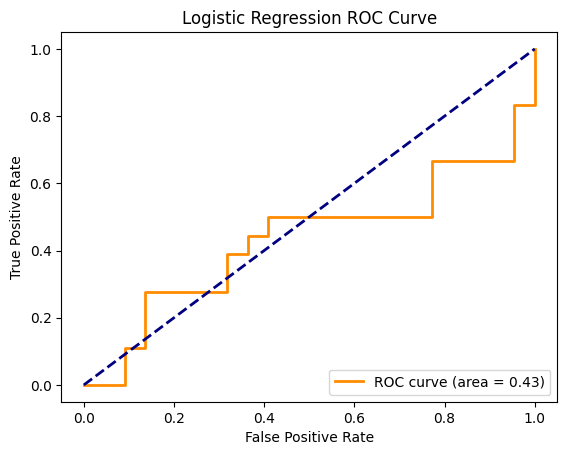

0.43434343434343436


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


# ROC Curve for Logistic Regression
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

